In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from adjustText import adjust_text

In [3]:
from nba_api.stats.endpoints.leaguedashptstats import LeagueDashPtStats
from nba_api.stats.endpoints.synergyplaytypes import SynergyPlayTypes
from nba_api.stats.endpoints.leaguedashteamstats import LeagueDashTeamStats
from nba_api.stats.endpoints.leaguedashplayerstats import LeagueDashPlayerStats

In [33]:
reb_stats = LeagueDashPtStats(per_mode_simple='PerGame', pt_measure_type='Rebounding', season='2020-21').get_data_frames()[0]

In [34]:
reb_scoring = LeagueDashTeamStats(measure_type_detailed_defense='Misc', per_mode_detailed="PerGame", season='2020-21').get_data_frames()[0]

In [35]:
merged_df = pd.merge(left=reb_stats, right=reb_scoring, on=('TEAM_ID', 'TEAM_NAME'))

In [36]:
merged_df.loc[:, "PORB"] = merged_df.PTS_2ND_CHANCE / merged_df.OREB

In [37]:
plt.style.use('fivethirtyeight')

17

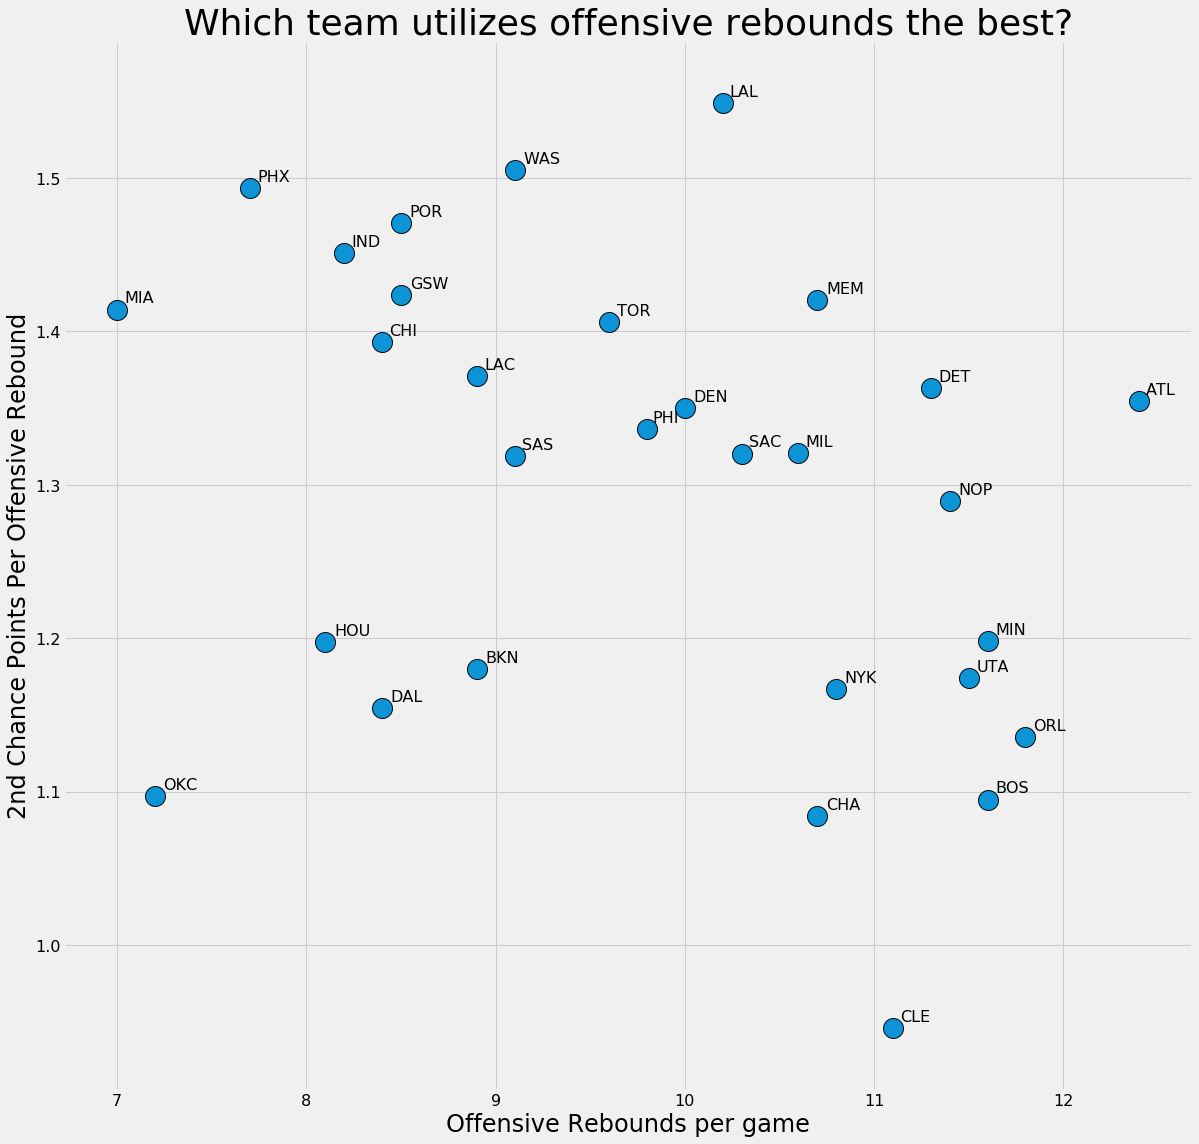

In [38]:
fig, ax = plt.subplots(figsize=(18, 18))

ax.scatter(x=merged_df.OREB, y=merged_df.PORB, s=400, alpha=0.95, edgecolors='black', lw=1)
texts = []
for i in range(len(merged_df)):
    item = merged_df.iloc[i]
    texts.append(ax.text(x=item.OREB, y=item.PORB, s=item.TEAM_ABBREVIATION, fontsize=16))

ax.set_xlabel("Offensive Rebounds per game", size=24)
ax.set_ylabel("2nd Chance Points Per Offensive Rebound", size=24)
ax.set_title("Which team utilizes offensive rebounds the best?", size=36)
ax.tick_params(axis='both', which='major', labelsize=16)
adjust_text(texts, expand_points=(1.5, 1.5))

### HR

In [ ]:
fig, ax = plt.subplots(figsize=(18, 18))

ax.scatter(x=merged_df.OREB, y=merged_df.PORB, s=400, alpha=0.95, edgecolors='black', lw=1)
texts = []
for i in range(len(merged_df)):
    item = merged_df.iloc[i]
    texts.append(ax.text(x=item.OREB, y=item.PORB, s=item.TEAM_ABBREVIATION, fontsize=16))

ax.set_xlabel("Offensive Rebounds per game", size=24)
ax.set_ylabel("2nd Chance Points Per Offensive Rebound", size=24)
ax.set_title("Which team utilizes offensive rebounds the best?", size=36)
adjust_text(texts, expand_points=(1.5, 1.5))

### Player Stats

In [4]:
reb_stats = LeagueDashPtStats(player_or_team='Player', per_mode_simple='PerGame', pt_measure_type='Rebounding', season='2020-21').get_data_frames()[0]

In [7]:
reb_scoring = LeagueDashPlayerStats(measure_type_detailed_defense='Misc', per_mode_detailed="PerGame", season='2020-21').get_data_frames()[0]


In [21]:
merged_df = pd.merge(left=reb_stats, right=reb_scoring, on=('PLAYER_ID', 'PLAYER_NAME'))

merged_df.loc[:, "PORB"] = merged_df.PTS_2ND_CHANCE / merged_df.OREB

plt.style.use('fivethirtyeight')

In [22]:
target_df = merged_df.loc[merged_df.OREB > 2]

In [29]:
other = merged_df.loc[(~merged_df.PLAYER_ID.isin(target_df.PLAYER_ID)) & (merged_df.GP_x > 4) & (merged_df.OREB > 0.5)]

In [30]:
merged_df

,PLAYER_ID,PLAYER_NAME,TEAM_ID_x,TEAM_ABBREVIATION_x,GP_x,W_x,L_x,MIN_x,OREB,OREB_CONTEST,...,OPP_PTS_FB_RANK,OPP_PTS_PAINT_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,NBA_FANTASY_PTS_RANK,CFID,CFPARAMS,PORB
0,203932,Aaron Gordon,1610612753,ORL,10,6,4,27.2,1.3,1.0,...,306,70,88,386,209,56,80,5,"203932,1610612753",1.769231
1,1628988,Aaron Holiday,1610612754,IND,11,7,4,21.3,0.4,0.1,...,267,203,287,325,358,302,256,5,"1628988,1610612754",0.750000
2,1630174,Aaron Nesmith,1610612738,BOS,3,2,1,13.0,0.3,0.3,...,177,332,194,1,352,423,388,5,"1630174,1610612738",0.000000
3,1627846,Abdel Nader,1610612756,PHX,1,0,1,3.3,0.0,0.0,...,1,415,340,1,1,261,404,5,"1627846,1610612756",NaN
4,1629690,Adam Mokoka,1610612741,CHI,5,0,5,7.8,0.2,0.2,...,34,387,265,1,111,423,385,5,"1629690,1610612741",2.000000
5,201143,Al Horford,1610612760,OKC,9,5,4,27.1,0.6,0.3,...,263,135,78,216,205,310,112,5,"201143,1610612760",1.000000
6,202692,Alec Burks,1610612752,NYK,3,1,2,27.6,0.0,0.0,...,447,6,93,443,443,29,58,5,"202692,1610612752",inf
7,1630197,Aleksej Pokusevski,1610612760,OKC,9,4,5,16.5,0.4,0.0,...,100,263,28,1,111,421,273,5,"1630197,1610612760",1.750000
8,1627936,Alex Caruso,1610612747,LAL,8,6,2,17.4,0.4,0.1,...,195,265,310,247,147,382,268,5,"1627936,1610612747",1.250000
9,203458,Alex Len,1610612761,TOR,7,2,5,10.8,0.0,0.0,...,126,331,70,128,189,343,373,5,"203458,1610612761",inf


18

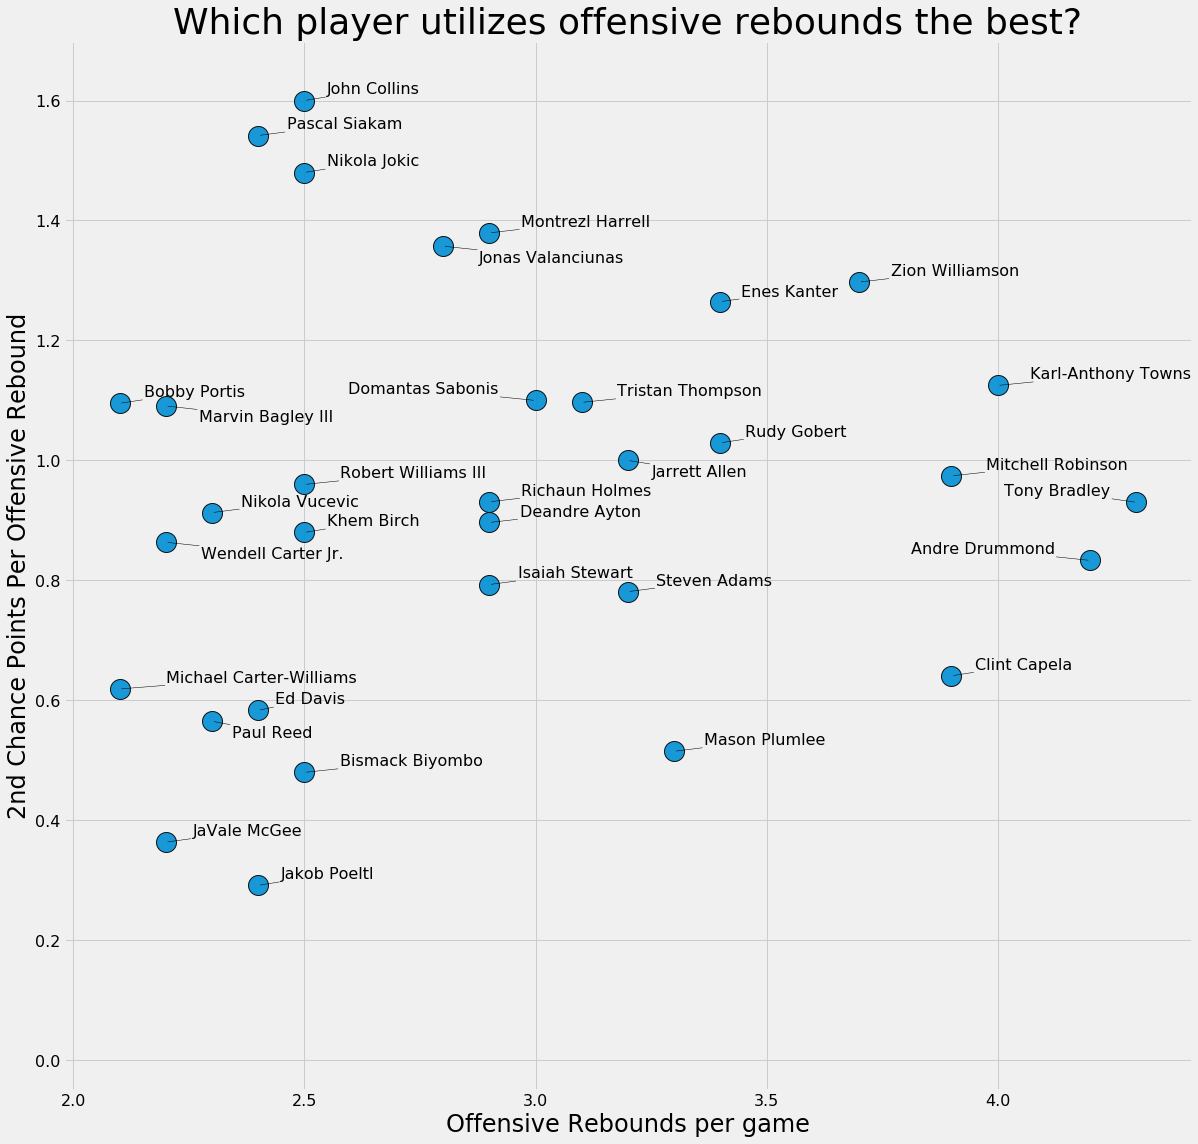

In [32]:
fig, ax = plt.subplots(figsize=(18, 18))

#ax.scatter(x=other.OREB, y=other.PORB, s=150, alpha=0.75, color='#787878', edgecolors='black', lw=1)
ax.scatter(x=target_df.OREB, y=target_df.PORB, s=400, alpha=0.9, edgecolors='black', lw=1)

texts = []
for i in range(len(target_df)):
    item = target_df.iloc[i]
    texts.append(ax.text(x=item.OREB, y=item.PORB, s=item.PLAYER_NAME, fontsize=16))


ax.set_xlabel("Offensive Rebounds per game", size=24)
ax.set_ylabel("2nd Chance Points Per Offensive Rebound", size=24)
ax.set_title("Which player utilizes offensive rebounds the best?", size=36)
ax.set_ylim(-0.05, 1.7)
#ax.set_xlim(-0.05, 4.5)
ax.tick_params(axis='both', which='major', labelsize=16)
adjust_text(texts, expand_points=(1.5, 1.5), arrowprops={'arrowstyle': '-', 'color': 'black'})
